## Urban Scaling

In [1]:
# Import basic packages
import numpy as np
import scipy as sp
import pandas as pd


# Matplotlib, 
import matplotlib.pyplot as plt # For plotting
import seaborn as sns
%matplotlib inline

What I do in the cell below is in order to make figures more beautiful
It is not necessary to use it or try to understand how it works
but feel free to use it - it will make your plots prettier!

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=9):
    

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    plt.rc('text', usetex=False)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()

#### Let's read the GDP data

Now let's read the GDP data using pandas to create a dataframe. Note that in the provided csv I have added one more row, containing the labels for each column, namely `City`, `Population` and `GDP`.

In [3]:
# Read the data
GDP_df = pd.read_csv('gdp_simple.csv')
# Show the few first lines
GDP_df.head()

,City,Population,GDP
0,Abilene,158822,3963
1,Akron,700095,22895
2,Albany,163150,3998
3,Albany,851195,31088
4,Albuquerque,817794,30827


Now, create arrays containing the names of cities, their population and GDP. 
Here I multiply GDP by 1000, since what is provided is in thousands of dollars.

In [5]:
Cities = GDP_df['City'].values
Population = GDP_df['Population'].values
GDP = 1000*GDP_df['GDP'].values

Now get the logarithms of the GDP and the population.

In [6]:
Log_Pop = np.log10(Population)
Log_GDP = np.log10(GDP)

To fit a linear regression in Python I can use many packages, like the `scipy_optimize`, `statmodels` and `scikit-learn`. Here I decided to use the linear regression from the `scikit-learn` package, since it a very popular package for many machine learning applications.

Predict goodness of fit $R^2$ and intercept, and measured coefficient $\hat{\beta}$.

In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(Log_Pop.reshape(-1,1), Log_GDP)

print(reg.score(Log_Pop.reshape(-1,1), Log_GDP))

print(reg.coef_)
print(reg.intercept_)


0.9629832814516648
[1.12609123]
0.8091308345616053


Plot now data, best fit and theory

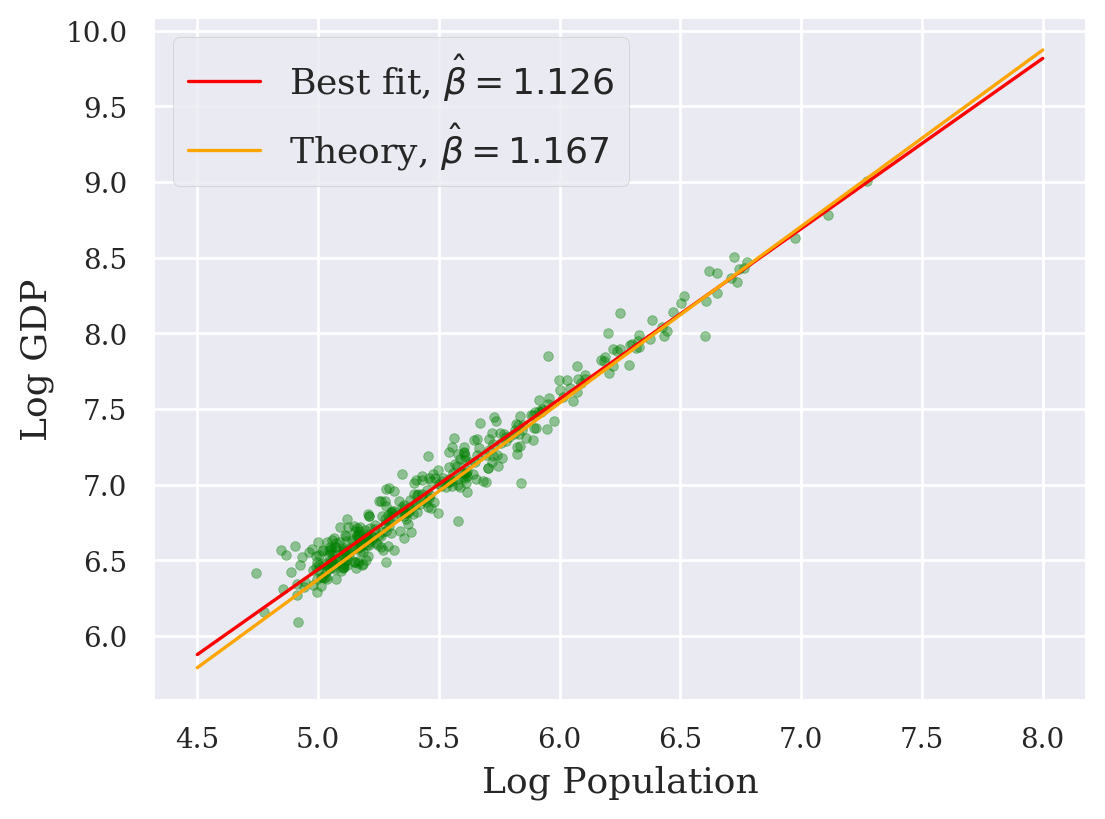

In [17]:
x = np.linspace(4.5,8)
y_fit =0.809 + 1.126*x
y_theory = 0.809-0.27 + (7.0/6.0)*x

plt.figure(figsize = (6.,4.5))

plt.scatter(Log_Pop,Log_GDP,c='green', s=12, alpha=0.4)
plt.plot(x,y_fit, linewidth=1.2,c='r', label=r'Best fit, $\hat{\beta}=1.126$')
plt.plot(x,y_theory, linewidth=1.2,c='orange',label=r'Theory, $\hat{\beta}=1.167$')



plt.legend(frameon=True, loc='upper left', fontsize=13)
plt.xlabel('LoLg Population',fontsize=13)
plt.ylabel('Log GDP',fontsize=13)
plt.show()

Now, I calculate outliers. To do that, I estimate the residuals by subtracting the best fit from the observed Log_GDP. These are the $\xi$ values we discussed about in class.

In [18]:
residuals_GDP = Log_GDP - (0.809+1.126*Log_Pop)

Plot the residuals

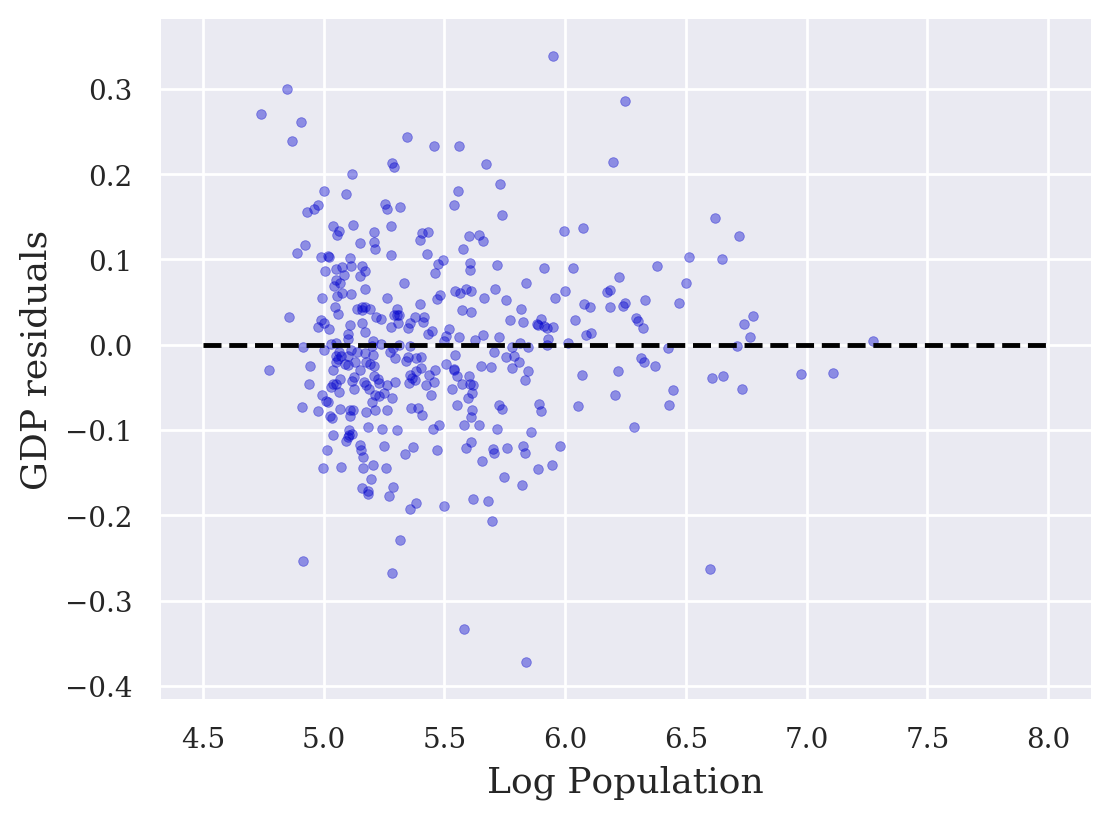

In [23]:
x = np.linspace(4.5,8)
y_0 =0*x
plt.figure(figsize = (6.,4.5))


plt.scatter(Log_Pop,residuals_GDP,c='mediumblue', s=12, alpha=0.4)
plt.plot(x,y_0,c='k',ls='--')

plt.xlabel('Log Population',fontsize=13)
plt.ylabel('GDP residuals',fontsize=13)
plt.show()

We can plot the most well-performing cities, those with residuals > 0.2 and the most underperforming cities, those with residuals < -0.2

In [30]:
# Overperforming cities
Over_GDP = Cities[residuals_GDP>0.2]
Under_GDP = Cities[residuals_GDP<-0.2]

Most overperforming cities:

In [31]:
print(Over_GDP)

['Boulder' 'Bridgeport' 'Carson City' 'Casper' 'Charlotte' 'Columbus'
 'Corvallis' 'Durham' 'Elkhart' 'Lake Charles' 'Napa' 'San Jose'
 'Sioux Falls' 'Trenton']


Underperforming cities:

In [32]:
print(Under_GDP)

['Brownsville' 'Deltona' 'Lake Havasu City' 'McAllen' 'Palm Coast'
 'Prescott' 'Riverside']


Let's replot the first plot, highlingthing the overperforming/underperforming cities

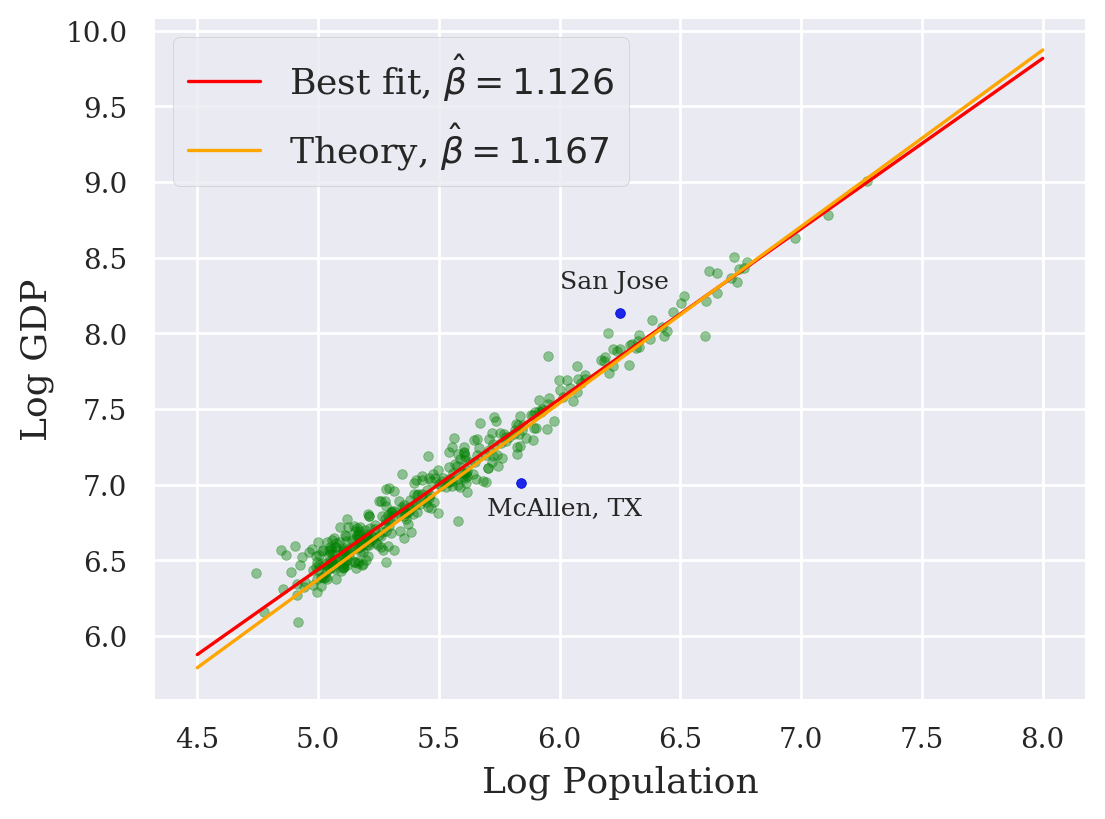

In [49]:
x = np.linspace(4.5,8)
y_fit =0.809 + 1.126*x
y_theory = 0.809-0.27 + (7.0/6.0)*x

plt.figure(figsize = (6.,4.5))

plt.scatter(Log_Pop,Log_GDP,c='green', s=12, alpha=0.4)
plt.plot(x,y_fit, linewidth=1.2,c='r', label=r'Best fit, $\hat{\beta}=1.126$')
plt.plot(x,y_theory, linewidth=1.2,c='orange',label=r'Theory, $\hat{\beta}=1.167$')

plt.scatter(Log_Pop[Cities=='San Jose'],Log_GDP[Cities=='San Jose']
          ,c='blue', s=12, alpha=0.8)
plt.text(6.,8.3,'San Jose')

plt.scatter(Log_Pop[Cities=='McAllen'],Log_GDP[Cities=='McAllen']
          ,c='blue', s=12, alpha=0.8)
plt.text(5.7,6.8,'McAllen, TX')

plt.legend(frameon=True, loc='upper left', fontsize=13)
plt.xlabel('Log Population',fontsize=13)
plt.ylabel('Log GDP',fontsize=13)
plt.show()

## Similarly for roads/ areas
(Left as an excersize for the reader)